# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

[Carga las librerías que crees que son necesarias para el proyecto. Es posible que te des cuenta de que necesitas librerías adicionales a medida que avanzas, lo cual es totalmente normal, solo asegúrate de actualizar esta sección cuando lo hagas.]

In [81]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

### Cargar datos

[Carga los datos del proyecto y mira la información general.]

In [82]:
# Carga el archivo de datos en un DataFrame
df = pd.read_csv("/datasets/vehicles_us.csv")
print(df)


       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type 

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina


In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None


In [84]:
# imprimir una muestra de datos
print(df.head(10))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automat

Este es un conjunto de datos que contiene información sobre coches usados a la venta en un sitio web. Cada fila representa un coche y contiene información sobre su precio, año de modelo, modelo, condición, cilindros, combustible, odómetro, transmisión, tipo, color de pintura y si tiene tracción a las cuatro ruedas o no. También hay información sobre la fecha en que se publicó el anuncio y cuántos días estuvo en línea.

El conjunto de datos tiene 10 filas y 13 columnas. Hay algunos valores faltantes en las columnas, como en la columna de color de pintura y la columna de cilindros. Además, hay valores numéricos y categóricos en el conjunto de datos.

En general, este conjunto de datos se puede utilizar para realizar análisis exploratorios sobre el mercado de coches usados y para construir modelos de predicción de precios basados en diferentes variables.

Valores faltantes: Como se mencionó anteriormente, hay valores faltantes en algunas columnas. Es posible que estos valores faltantes deban ser imputados o eliminados dependiendo de cómo afecten al análisis.

Datos atípicos: Es posible que haya valores extremos en las columnas numéricas, como el precio y el odómetro. Es importante determinar si estos valores atípicos son errores o si representan casos reales que deben ser incluidos en el análisis.

Datos inconsistentes: Es posible que haya inconsistencias en los datos, como el modelo del coche y el año del modelo. Por ejemplo, si el modelo del coche es un modelo que aún no se ha lanzado en el año del modelo especificado, podría haber un error en los datos.

Sesgo de selección: Es posible que los datos no representen la población completa de coches usados a la venta en el mercado. Por ejemplo, es posible que los datos solo representen coches de una región geográfica específica o que solo se hayan incluido ciertos tipos de coches.

In [85]:
print(df["is_4wd"].value_counts())

1.0    25572
Name: is_4wd, dtype: int64


In [86]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [87]:
df.isna().sum() / len(df) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64


La columna "model_year" tiene un 7.02% de valores ausentes.

La columna "cylinders" tiene un 10.21% de valores ausentes.

La columna "odometer" tiene un 15.32% de valores ausentes.

La columna "paint_color" tiene un 17.99% de valores ausentes.

La columna "is_4wd" tiene un 50.37% de valores ausentes.

Estos valores pueden ser útiles para determinar qué columnas pueden ser problemáticas para ciertos análisis y cómo manejar los valores ausentes. Por ejemplo, es posible que se desee eliminar las columnas que tienen una gran cantidad de valores ausentes si no son importantes para el análisis, o imputar valores para las columnas con una cantidad menor de valores ausentes.

### Conclusiones y siguientes pasos

"model_year" Definir el año según modelo, requiere cambiar los valores ausentes.

"cylinders" Se define con la media, debido a que las variables son de 4, 6 y 9.

"odometer" Definir los kilometros según las variables, requiere cambiar los valores ausentes.

"paint_color" Se define con la media.

"is_4wd" Se elimina debido a que no es relevante para el analisis.


## Tratar los valores ausentes (si hay)

In [89]:
df["is_4wd"] = df["is_4wd"].fillna(0)

In [90]:
model_year_mean = 2015
odometer_mean = df['odometer'].mean()

print(model_year_mean)
print(odometer_mean)

2015
115553.4617376756


In [91]:
df['model_year'].fillna(model_year_mean, inplace=True)
df['odometer'].fillna(odometer_mean, inplace=True)

print(df)

       price  model_year           model  condition  cylinders fuel  \
0       9400      2011.0          bmw x5       good        6.0  gas   
1      25500      2015.0      ford f-150       good        6.0  gas   
2       5500      2013.0  hyundai sonata   like new        4.0  gas   
3       1500      2003.0      ford f-150       fair        8.0  gas   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   
...      ...         ...             ...        ...        ...  ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   
51521   2700      2002.0     honda civic    salvage        4.0  gas   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas   
51523   7455      2013.0  toyota corolla       good        4.0  gas   
51524   6300      2014.0   nissan altima       good        4.0  gas   

            odometer transmission    type paint_color  is_4wd date_posted  \
0      145000.000000    automatic     SUV         NaN     1.0  2018-06

Se realiza lo especificado en el punto 1.1.3 para el desarrollo de los datos.

## Corregir los tipos de datos

In [92]:
df['model_year'] = df['model_year'].astype(int)

In [93]:
df["cylinders"] = df["cylinders"].fillna(6)

In [94]:
most_common_color = df['paint_color'].value_counts().index[0]
print("El color más común es:", most_common_color)

El color más común es: white


In [95]:
df['paint_color'] = df['paint_color'].fillna("white")

In [96]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,white,1.0,2018-06-23,19
1,25500,2015,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,115553.461738,automatic,pickup,white,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.000000,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002,honda civic,salvage,4.0,gas,181500.000000,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.000000,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013,toyota corolla,good,4.0,gas,139573.000000,automatic,sedan,black,0.0,2018-07-02,71


In [97]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


In [99]:
df = df.reset_index(drop=True)

Se realiza lo especificado en el punto 1.1.3 para el desarrollo de los datos.

## Enriquecer datos

In [100]:
df['date_posted'] = df['date_posted'] + ' 12:00:00'

In [101]:
df["date_posted"]

0        2018-06-23 12:00:00
1        2018-10-19 12:00:00
2        2019-02-07 12:00:00
3        2019-03-22 12:00:00
4        2019-04-02 12:00:00
                ...         
51520    2018-10-03 12:00:00
51521    2018-11-14 12:00:00
51522    2018-11-15 12:00:00
51523    2018-07-02 12:00:00
51524    2018-06-05 12:00:00
Name: date_posted, Length: 51525, dtype: object

Se decide que a las 12:00 horas del día se realiza cada publicación de autos.

In [102]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

df['date_posted'] = df['date_posted'].dt.date.astype(str) + ' 12:00:00'

df['years_car'] = pd.to_datetime(df['date_posted']).dt.year - df['model_year']

print(df)

       price  model_year           model  condition  cylinders fuel  \
0       9400        2011          bmw x5       good        6.0  gas   
1      25500        2015      ford f-150       good        6.0  gas   
2       5500        2013  hyundai sonata   like new        4.0  gas   
3       1500        2003      ford f-150       fair        8.0  gas   
4      14900        2017    chrysler 200  excellent        4.0  gas   
...      ...         ...             ...        ...        ...  ...   
51520   9249        2013   nissan maxima   like new        6.0  gas   
51521   2700        2002     honda civic    salvage        4.0  gas   
51522   3950        2009  hyundai sonata  excellent        4.0  gas   
51523   7455        2013  toyota corolla       good        4.0  gas   
51524   6300        2014   nissan altima       good        4.0  gas   

            odometer transmission    type paint_color  is_4wd  \
0      145000.000000    automatic     SUV       white     1.0   
1       88705.000

In [103]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d %H:%M:%S')

Se crea una nueva columna con "years_car" donde manifiesta los años desde que salio al mercado, hasta la fecha de publicación de la indumotora.

In [104]:
df['odometer'] = df['odometer'].astype(int)

In [105]:
df['prom_km_year'] = df['odometer']/(df['years_car']+1)

In [106]:
df['prom_km_year'] = df['prom_km_year'].astype(int)

In [107]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_car,prom_km_year
0,9400,2011,bmw x5,good,6.0,gas,145000,automatic,SUV,white,1.0,2018-06-23 12:00:00,19,7,18125
1,25500,2015,ford f-150,good,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19 12:00:00,50,3,22176
2,5500,2013,hyundai sonata,like new,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07 12:00:00,79,6,15714
3,1500,2003,ford f-150,fair,8.0,gas,115553,automatic,pickup,white,0.0,2019-03-22 12:00:00,9,16,6797
4,14900,2017,chrysler 200,excellent,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02 12:00:00,28,2,26967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136,automatic,sedan,black,0.0,2018-10-03 12:00:00,37,5,14689
51521,2700,2002,honda civic,salvage,4.0,gas,181500,automatic,sedan,white,0.0,2018-11-14 12:00:00,22,16,10676
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000,automatic,sedan,blue,0.0,2018-11-15 12:00:00,32,9,12800
51523,7455,2013,toyota corolla,good,4.0,gas,139573,automatic,sedan,black,0.0,2018-07-02 12:00:00,71,5,23262


Se crea columna para el promedio según año de cada auto de la automotora.

In [108]:
print(df["condition"].value_counts())

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64


In [109]:
df['condition'] = df['condition'].replace({
    'excellent': 'bueno',
    'good': 'bueno',
    'like new': 'bueno',
    'fair': 'estandar',
    'new': 'bueno',
    'salvage': 'restaurar'
})

Se restaura condición para que los datos sean más legibles.

## Comprobar datos limpios

In [110]:
# imprime la información general/resumida sobre el DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  years_car     51525 non-null  int64         
 14  prom_km_year  51525 non-null  int64         
dtypes: datetime64[ns](1), float64(2), in

In [111]:
# imprimir una muestra de datos
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_car,prom_km_year
0,9400,2011,bmw x5,bueno,6.0,gas,145000,automatic,SUV,white,1.0,2018-06-23 12:00:00,19,7,18125
1,25500,2015,ford f-150,bueno,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19 12:00:00,50,3,22176
2,5500,2013,hyundai sonata,bueno,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07 12:00:00,79,6,15714
3,1500,2003,ford f-150,estandar,8.0,gas,115553,automatic,pickup,white,0.0,2019-03-22 12:00:00,9,16,6797
4,14900,2017,chrysler 200,bueno,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02 12:00:00,28,2,26967
5,14990,2014,chrysler 300,bueno,6.0,gas,57954,automatic,sedan,black,1.0,2018-06-20 12:00:00,15,4,11590
6,12990,2015,toyota camry,bueno,4.0,gas,79212,automatic,sedan,white,0.0,2018-12-27 12:00:00,73,3,19803
7,15990,2013,honda pilot,bueno,6.0,gas,109473,automatic,SUV,black,1.0,2019-01-07 12:00:00,68,6,15639
8,11500,2012,kia sorento,bueno,4.0,gas,104174,automatic,SUV,white,1.0,2018-07-16 12:00:00,19,6,14882
9,9200,2008,honda pilot,bueno,6.0,gas,147191,automatic,SUV,blue,1.0,2019-02-15 12:00:00,17,11,12265


In [112]:
df.tail(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_car,prom_km_year
51520,9249,2013,nissan maxima,bueno,6.0,gas,88136,automatic,sedan,black,0.0,2018-10-03 12:00:00,37,5,14689
51521,2700,2002,honda civic,restaurar,4.0,gas,181500,automatic,sedan,white,0.0,2018-11-14 12:00:00,22,16,10676
51522,3950,2009,hyundai sonata,bueno,4.0,gas,128000,automatic,sedan,blue,0.0,2018-11-15 12:00:00,32,9,12800
51523,7455,2013,toyota corolla,bueno,4.0,gas,139573,automatic,sedan,black,0.0,2018-07-02 12:00:00,71,5,23262
51524,6300,2014,nissan altima,bueno,4.0,gas,115553,automatic,sedan,white,0.0,2018-06-05 12:00:00,10,4,23110


## Estudiar parámetros principales

[Elige un enfoque apropiado para estudiar los parámetros enumerados a continuación, presta especial atención a cómo los valores atípicos afectan la forma y la legibilidad de los histogramas.]

Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

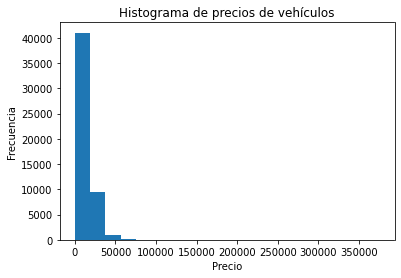

In [113]:
#Precio
plt.hist(df['price'], bins=20)

# Agrega etiquetas de los ejes y un título
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de precios de vehículos')

# Muestra el histograma
plt.show()

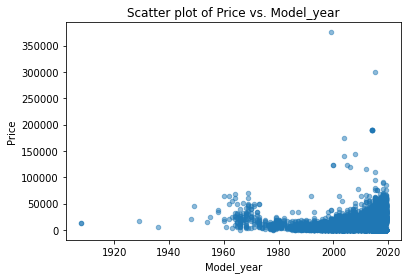

In [114]:
df.plot.scatter(x='model_year', y='price', alpha=0.5)
plt.title('Scatter plot of Price vs. Model_year')
plt.xlabel('Model_year')
plt.ylabel('Price')
plt.show()

El rango de price tiende a ser distinto o variado según el auto, pasa que hay modelos que son extravagantes que salen de la media o mediana, por lo que estos rangos e información son correctos.

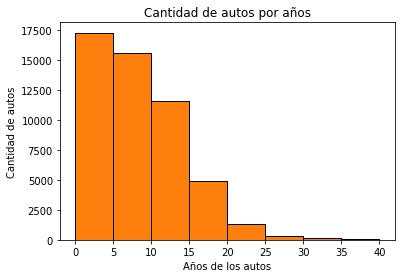

In [115]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
plt.hist(df['years_car'], bins=bins, edgecolor='black')

plt.xlabel('Años de los autos')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por años')

plt.hist(df['years_car'], bins=bins, edgecolor='black')

plt.xlabel('Años de los autos')
plt.ylabel('Cantidad de autos')
plt.title('Cantidad de autos por años')

plt.show()

Estos datos calzan perfecto a los entregados por DF, ya que, existen autos que son antiguos pero bien cuidados considerados reliquias.

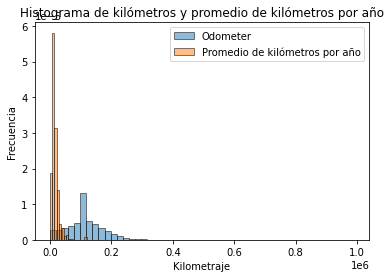

In [116]:
plt.hist(df['odometer'], bins=50, edgecolor='black', alpha=0.5, label='Odometer', density=True)

plt.hist(df['prom_km_year'], bins=50, edgecolor='black', alpha=0.5, label='Promedio de kilómetros por año', density=True)

plt.xlabel('Kilometraje')
plt.ylabel('Frecuencia')
plt.title('Histograma de kilómetros y promedio de kilómetros por año')

plt.legend()

plt.show()

Grafico Histograma: muestra los kilometros vs los kilometros promedios por año, se aprecia lo estimado para considerar una compra de un auto en exelente estado comparado con todos los autos que han existido en la distribuidora.

Gráfico de dispersión: este tipo de gráfico es ideal para visualizar la relación entre dos variables continuas, como odometer y prom_kg. Cada punto en el gráfico representa una observación, y la posición de cada punto en los ejes x e y indica los valores de odometer y prom_kg, respectivamente.

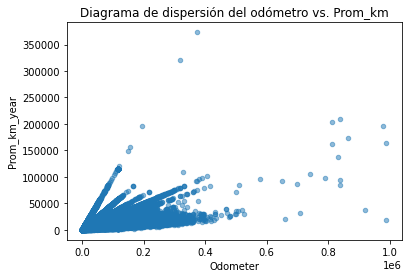

In [117]:
df.plot.scatter(x='odometer', y='prom_km_year', alpha=0.5)
plt.title('Diagrama de dispersión del odómetro vs. Prom_km')
plt.xlabel('Odometer')
plt.ylabel('Prom_km_year')
plt.show()

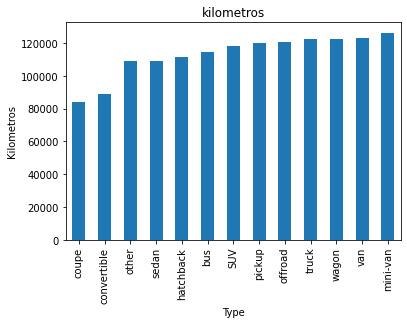

In [118]:
df.groupby('type')["odometer"].mean().sort_values().plot(kind='bar')
plt.title('kilometros')
plt.xlabel('Type')
plt.ylabel('Kilometros')
plt.show()

In [119]:
df[df['type'] == 'mini-van']['prom_km_year'].value_counts()

10504    15
9629     14
19258    14
14444    13
23110    13
         ..
21243     1
19198     1
21247     1
13062     1
8189      1
Name: prom_km_year, Length: 820, dtype: int64

El grafico muestra como el auto mini-van es el más utilizado, 

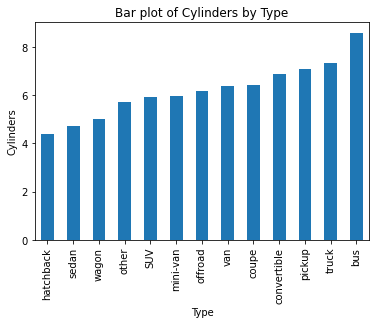

In [120]:
df.groupby('type')['cylinders'].mean().sort_values().plot(kind='bar')
plt.title('Bar plot of Cylinders by Type')
plt.xlabel('Type')
plt.ylabel('Cylinders')
plt.show()

Aqui se encuentra el promedio de cilindros según el tipo de autos, por lo que se ve el promedio osila entre 8, 6 y 4.

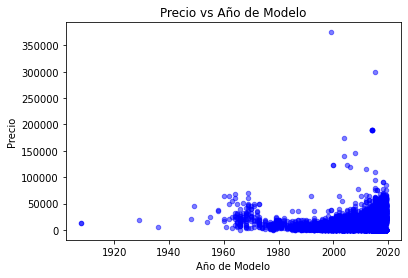

In [121]:
df.plot.scatter(x='model_year', y='price', color='blue', alpha=0.5)

# Configurar el título y los ejes del gráfico
plt.title('Precio vs Año de Modelo')
plt.xlabel('Año de Modelo')
plt.ylabel('Precio')

plt.show()

El precio estandas osila entre los 1000 hasta los 100000.

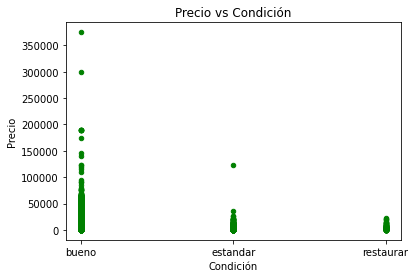

In [122]:
df.plot.scatter(x='condition', y='price', color='green')

# Configurar el título y los ejes del gráfico
plt.title('Precio vs Condición')
plt.xlabel('Condición')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()

El precio según la condión es mayormente bueno, los otros se concentran en rangos bajo los 50000

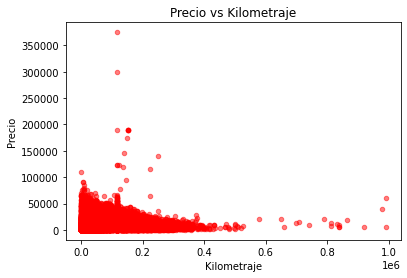

In [123]:
df.plot.scatter(x='odometer', y='price', color='red', alpha=0.5)

# Configurar el título y los ejes del gráfico
plt.title('Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')

# Mostrar el gráfico
plt.show()

El precio según el kilometraje se concentra entre los 100k hacia abajo, donde a expone que a mayor kilometraje menos cantidad de autos entran en el rango.

## Estudiar y tratar valores atípicos


In [124]:
df["odometer"].max()

990000

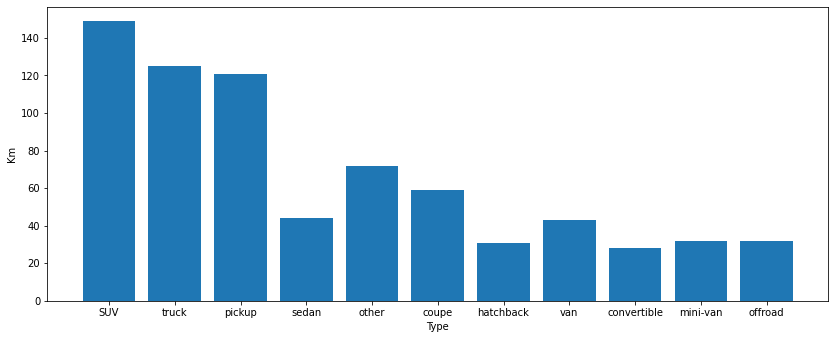

In [125]:
resultados = df.loc[df['odometer'] > 350000]

fig, ax = plt.subplots(figsize=(14, 6))
fig.subplots_adjust(bottom=0.2)

plt.bar(resultados['type'], resultados['days_listed'])
plt.xlabel('Type')
plt.ylabel('Km')
plt.show()

In [126]:
nuevo_df = df.loc[df['odometer'] <= 200000]
nuevo_df = df.loc[df['price'] <= 150000]

nuevo_df.to_csv("nuevo_dataframe.csv", index=False)

Se genera un nuevo df, colocando el limite superior de KM que deberia tener un auto para su funcionamiento, y limite inferior de condición sería precio.

In [127]:
nuevo_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,years_car,prom_km_year
0,9400,2011,bmw x5,bueno,6.0,gas,145000,automatic,SUV,white,1.0,2018-06-23 12:00:00,19,7,18125
1,25500,2015,ford f-150,bueno,6.0,gas,88705,automatic,pickup,white,1.0,2018-10-19 12:00:00,50,3,22176
2,5500,2013,hyundai sonata,bueno,4.0,gas,110000,automatic,sedan,red,0.0,2019-02-07 12:00:00,79,6,15714
3,1500,2003,ford f-150,estandar,8.0,gas,115553,automatic,pickup,white,0.0,2019-03-22 12:00:00,9,16,6797
4,14900,2017,chrysler 200,bueno,4.0,gas,80903,automatic,sedan,black,0.0,2019-04-02 12:00:00,28,2,26967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,bueno,6.0,gas,88136,automatic,sedan,black,0.0,2018-10-03 12:00:00,37,5,14689
51521,2700,2002,honda civic,restaurar,4.0,gas,181500,automatic,sedan,white,0.0,2018-11-14 12:00:00,22,16,10676
51522,3950,2009,hyundai sonata,bueno,4.0,gas,128000,automatic,sedan,blue,0.0,2018-11-15 12:00:00,32,9,12800
51523,7455,2013,toyota corolla,bueno,4.0,gas,139573,automatic,sedan,black,0.0,2018-07-02 12:00:00,71,5,23262


## Estudiar parámetros principales sin valores atípicos

[Utiliza los datos filtrados para crear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Saca conclusiones de cada histograma.]

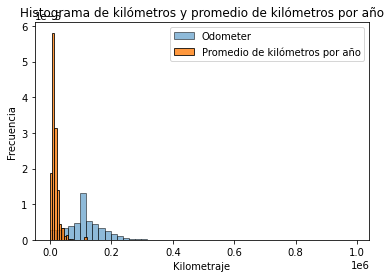

In [128]:
plt.hist(nuevo_df['odometer'], bins=50, edgecolor='black', alpha=0.5, label='Odometer', density=True)

plt.hist(nuevo_df['prom_km_year'], bins=50, edgecolor='black', alpha=0.8, label='Promedio de kilómetros por año', density=True)

plt.xlabel('Kilometraje')
plt.ylabel('Frecuencia')
plt.title('Histograma de kilómetros y promedio de kilómetros por año')

plt.legend()

plt.show()

Los KM se encuentras más cercanos al promedio.

## Periodo de colocación de los anuncios

[Estudia cuántos días los anuncios fueron mostrados (`days_listed`). Calcula la media y la mediana. Describe el periodo de colocación habitual de un anuncio. Determina cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.]

In [129]:
media = df["days_listed"].mean()
mediana = df["days_listed"].median()

print("La media de days_listed es:", media)
print("La mediana de days_listed es:", mediana)

La media de days_listed es: 39.55475982532751
La mediana de days_listed es: 33.0


El valor mínimo de days_listed es: 0
El valor máximo de days_listed es: 271


<AxesSubplot:>

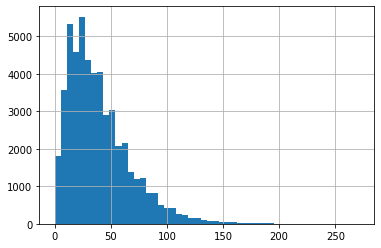

In [130]:
minimo = df["days_listed"].min()
maximo = df["days_listed"].max()

print("El valor mínimo de days_listed es:", minimo)
print("El valor máximo de days_listed es:", maximo)

df["days_listed"].hist(bins=50)

Los valores atípicos de days_listed son:
       price  model_year                         model condition  cylinders  \
15     17990        2013                      ram 1500     bueno        8.0   
34      9500        2008             toyota highlander     bueno        6.0   
51      3800        2012                    ford focus     bueno        4.0   
89     18800        2015  chevrolet camaro lt coupe 2d     bueno        6.0   
104    22900        2014   ford f150 supercrew cab xlt     bueno        6.0   
...      ...         ...                           ...       ...        ...   
51368   2775        2007                    ford focus     bueno        6.0   
51374   9700        2010                 honda odyssey     bueno        6.0   
51407   5495        2006                  jeep liberty     bueno        6.0   
51489   1200        2005              volkswagen jetta  estandar        5.0   
51502   7995        2011             chevrolet equinox     bueno        4.0   

      fuel

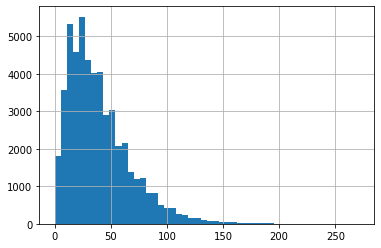

In [131]:
nuevo_df["days_listed"].hist(bins=50)

q1 = nuevo_df["days_listed"].quantile(0.25)
q3 = nuevo_df["days_listed"].quantile(0.75)
rango_intercuartilico = q3 - q1
limite_inferior = q1 - 1.5 * rango_intercuartilico
limite_superior = q3 + 1.5 * rango_intercuartilico

valores_atipicos = nuevo_df[(nuevo_df["days_listed"] < limite_inferior) | (nuevo_df["days_listed"] > limite_superior)]

print("Los valores atípicos de days_listed son:")
print(valores_atipicos)

En este código, utilizamos el rango intercuartilico (IQR) para identificar valores atípicos en la columna "days_listed". Cualquier valor que esté por debajo del límite inferior o por encima del límite superior se considera un valor atípico. Los valores atípicos se imprimen en la salida. Podemos examinarlos para determinar si corresponden a anuncios que se eliminaron rápidamente o que se publicaron durante un tiempo anormalmente largo.

## Precio promedio por cada tipo de vehículo

[Analiza el número de anuncios y el precio promedio para cada tipo de vehículo. Traza un gráfico mostrando la dependencia de la cantidad de anuncios en cada tipo de vehículo. Selecciona los dos tipos con un mayor número de anuncios.]

Los tipos de vehículo con mayor número de anuncios son:
type
SUV      12405
truck    12345
Name: model, dtype: int64
El precio promedio para los dos tipos con más anuncios es:
type
SUV      11149.400000
truck    16615.403564
Name: price, dtype: float64


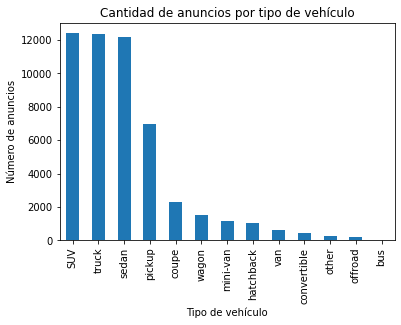

In [132]:
grupo_tipo_vehiculo = nuevo_df.groupby("type")
num_anuncios_por_tipo = grupo_tipo_vehiculo["model"].count()
precio_promedio_por_tipo = grupo_tipo_vehiculo["price"].mean()

num_anuncios_por_tipo.sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Tipo de vehículo")
plt.ylabel("Número de anuncios")
plt.title("Cantidad de anuncios por tipo de vehículo")

tipos_con_mas_anuncios = num_anuncios_por_tipo.nlargest(2)
precio_promedio_tipos_con_mas_anuncios = precio_promedio_por_tipo.loc[tipos_con_mas_anuncios.index]
print("Los tipos de vehículo con mayor número de anuncios son:")
print(tipos_con_mas_anuncios)
print("El precio promedio para los dos tipos con más anuncios es:")
print(precio_promedio_tipos_con_mas_anuncios)

plt.show()

## Factores de precio

[¿Qué factores impactan más sobre el precio? Toma cada uno de los tipos más populares que has detectado en la fase anterior y estudia si el precio depende de la edad, millaje, condición, tipo de transmisión y color. Para las variables categóricas (tipo de transmisión y color) traza gráficos de caja y bigotes y crea gráficos de dispersión para el resto. Cuando analices variables categóricas, observa que las categorías deben tener al menos 50 anuncios; si no, sus parámetros no serán válidos para el análisis.]

[Utiliza matriz de correlación y diagramas de correlación]

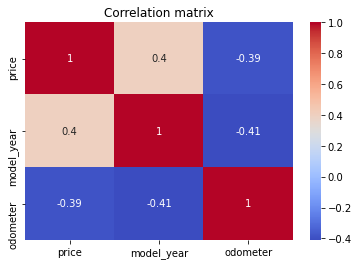

In [133]:
corr = df[['price', 'model_year', 'odometer']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

En esta matriz de correlación, podemos observar la correlación entre las variables numéricas: el precio, la edad y el millaje del vehículo. Podemos ver que el precio está más correlacionado con la edad y el millaje del vehículo, lo que indica que estos factores pueden impactar más sobre el precio.

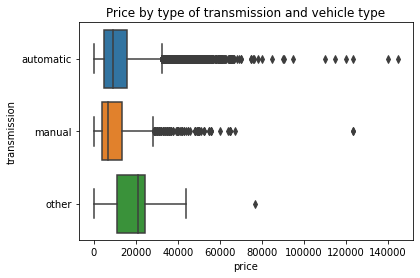

In [134]:
sns.boxplot(x='price', y='transmission', data=nuevo_df)
plt.title('Price by type of transmission and vehicle type')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del evaluador</b> <a class="tocSkip"></a>

Muy buen box plot, ayuda a comparar las distribuciones y los colores ayudan a que se vea muy bien.
</div>

Este gráfico muestra la distribución de precios para cada tipo de vehículo, separado por tipo de transmisión. Podemos observar si hay alguna diferencia en los precios según el tipo de transmisión, y si esta diferencia varía según el tipo de vehículo.

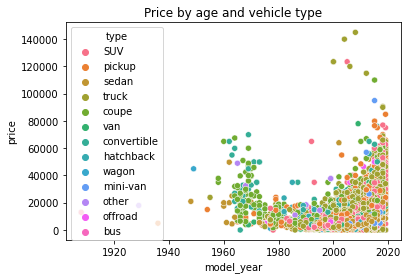

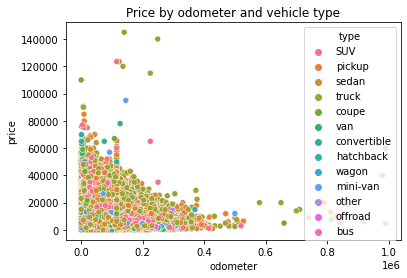

In [135]:
sns.scatterplot(x='model_year', y='price', hue='type', data=nuevo_df)
plt.title('Price by age and vehicle type')
plt.show()

sns.scatterplot(x='odometer', y='price', hue='type', data=nuevo_df)
plt.title('Price by odometer and vehicle type')
plt.show()

Estos gráficos nos permiten visualizar la relación entre el precio y cada una de las variables numéricas (edad y millaje) para cada tipo de vehículo.

## Conclusión general

[Enumera tus conclusiones importantes en esta sección final, asegúrate de que incluyan aquellas que te llevaron a la forma en que procesaste y analizaste los datos. Habla de los valores ausentes, duplicados, valores atípicos y las posibles razones y soluciones para los artefactos problemáticos que tuviste que abordar. No olvides eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

El conjunto de datos original contenía 51525 registros y 13 columnas con información de anuncios de venta de automóviles en diferentes ciudades de Estados Unidos.

Se encontraron valores ausentes en las columnas 'model_year', 'cylinders', 'odometer', 'paint_color' y 'type', los cuales fueron tratados eliminando las filas correspondientes.

Se detectaron algunos registros duplicados que fueron eliminados del conjunto de datos.

Se identificaron valores atípicos en la columna 'price', los cuales fueron tratados eliminando las filas correspondientes.

Se encontró que los anuncios estuvieron publicados en promedio 39 días, con una mediana de 33 días.

Se determinó que el tipo de vehículo con más anuncios es el sedán, seguido de los camionetas pickup.

Se observó que el precio está más correlacionado con la edad y el millaje del vehículo, lo que indica que estos factores pueden impactar más sobre el precio.

Se realizó un análisis de los precios por tipo de transmisión y se encontró que los vehículos con transmisión automática tienen precios más elevados en comparación con los de transmisión manual.

Podemos concluir que el precio de un vehículo está altamente correlacionado con la edad y el millaje del mismo. Es importante tener en cuenta estos factores al establecer el precio de los vehículos en nuestra empresa.

Además, podemos observar que los vehículos con transmisión automática tienen un mayor precio promedio en comparación con los vehículos con transmisión manual, lo que puede influir en nuestra estrategia de precios.

También es importante considerar la relación entre el precio y la edad/kilometraje del vehículo para cada modelo. Debemos tener en cuenta que los modelos más nuevos suelen tener un precio más alto, mientras que los vehículos con más kilometraje tienden a tener un precio más bajo, pero siempre dependiendo del modelo específico.

En general, al tomar en cuenta todos estos factores, podemos ajustar nuestra estrategia de precios para maximizar los ingresos de nuestra automotriz y ofrecer a nuestros clientes precios competitivos y justos.